In [9]:
#libraries
import os
import re
from typing import List, Union, Any
from dataclasses import dataclass

import numpy as np
import pandas as pd
from torch import nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from transformers import AutoTokenizer, AutoModel
import pickle

In [10]:
import os
import csv
from flask import Flask, request

In [11]:
#tf_idf vectorization ideaaaaaa
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
file_path_1 = '/Users/azkayounus/Desktop/modified_articles.csv'
file_path_2 = '/Users/azkayounus/Desktop/modified_customers.csv'
file_path_3 = '/Users/azkayounus/Desktop/modified_transaction.csv'
#file_path_4 = '/Users/azkayounus/Desktop/customer_transactions.csv'

In [13]:
file_path_4 = '/Users/azkayounus/Desktop/customer_transactions.csv'

In [14]:
customer_transaction =pd.read_csv(file_path_4)

In [15]:
article =pd.read_csv(file_path_1)
customers =pd.read_csv(file_path_2)
transaction =pd.read_csv(file_path_3)
#

In [16]:
pd.set_option('display.max_colwidth', None)

In [17]:
customer_transaction.tail()


customer_id  \
1362275  fdfd55a82781e51b05301b269fc91dfab6cf048f0e29e5d58c388156b14458af   
1362276  fe99a0069d6b3c64c2707d0ce53b9311540917471d82df6e0db01dcc057bc90c   
1362277  fecc5f77b5f7ee4570efde9ab05ec94d0de2bf80efb4f6fe55c8ea9c608b9b0c   
1362278                                      AhhaXDg5l6dTd6ZIBmgFvQL4BW93   
1362279                                      8J56gaLYqJNMA1vmrjSBJXEqLsr1   

                                                                   article_ids  
1362275                                918522001,915526001,915526001,776850001  
1362276  867969008,562245001,867969003,682550002,562245018,816598018,677930037  
1362277                                                              915611003  
1362278  673677001,551080020,648414023,673677004,673677001,673677001,673677001  
1362279                                                    673677001,551080020

In [18]:
customer_transaction.head()

customer_id  \
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318   
1  00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2   
2  00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280   
3  0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2   
4  000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       article_ids  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              663713001,541518023,663713001,578020002,723529001,351484002,351484002,727808001,727808007,858883002,851400006,750424014,750424014,870304002,870304002,852643001,852643003,794321007  
1  505221004,685687003,685687004,685687001,505221001,508184022,522992001,605106001,567618001,528931002,349301001,590414001,590414002,570309005,577992001,552570004,649018001,633150009,581162008,616808001,567618002,622964004,567618001,464454004,550718001,583533001,272591001,686406001,413707001,665851003,665851001,656213001,351933001,478549001,634591002,665654001,724244001,681569001,703843001,609598006,682899001,644073002,678079005,678079003,562637001,682334001,609598012,629801001,644763001,444325004,678339001,628794001,634591003,693387003,636392001,636392001,644073001,664075001,638939001,628816002,425217006,672800001,703656001,566618004,605939001,671502001,694671001,694671001,610665002,657291004,663613001,628816005,692778001,655267003,692778002,660108001,664368004,708352002,665654001,681376001,572187001,752945001,651697001,578478001,745843001,531526002,619580007,619580001,713692001,779136002,779136002,779136002,708379003,719260001,554784003,659983002,782643001,515815001,619580008,784278001,784278001,312878001,312878010,730683001,787147002,312878010,614622018,614622018,745745001,745745001,666444002,349301041,721257001,160442010,849942001,372860001,160442007,304786008,554757003,808651003  
2             

In [118]:
article.head()

article_id          prod_name product_type_name  product_group_name  \
0   108775015          Strap top          Vest top  Garment Upper body   
1   108775044          Strap top          Vest top  Garment Upper body   
2   108775051      Strap top (1)          Vest top  Garment Upper body   
3   110065001  OP T-shirt (Idro)               Bra           Underwear   
4   110065002  OP T-shirt (Idro)               Bra           Underwear   

  graphical_appearance_name colour_group_name perceived_colour_value_name  \
0                     Solid             Black                        Dark   
1                     Solid             White                       Light   
2                    Stripe         Off White                 Dusty Light   
3                     Solid             Black                        Dark   
4                     Solid             White                       Light   

  department_name        index_name garment_group_name  \
0    Jersey Basic        Ladieswear       Jersey Basic   
1    Jersey Basic        Ladieswear       Jersey Basic   
2    Jersey Basic        Ladieswear       Jersey Basic   
3  Clean Lingerie  Lingeries/Tights  Under-, Nightwear   
4  Clean Lingerie  Lingeries/Tights  Under-, Nightwear   

                                                                                                                                                                                                                                        detail_desc  \
0                                                                                                                                                                                                           Jersey top with narrow shoulder straps.   
1                                                                                                                                                                                                           Jersey top with narrow shoulder straps.   
2                                                                                                                                                                                                           Jersey top with narrow shoulder straps.   
3  Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.   
4  Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.   

                                                                                                                                                                                                                                                                                                                                                                     text  
0                                                                                                                                                                                                                   strap top - vest top - garment upper body - solid - black - dark - jersey basic - ladieswear - jersey basic - jersey top with narrow shoulder straps.  
1                                                                                                                                                                                                                  strap top - vest top - garment upper body - solid - white - light - jersey basic - ladieswear - jersey basic - jersey top with narrow shoulder straps.  
2                                                                                                                                                                          

In [120]:
transaction.head()

t_dat  \
0  2018-09-20   
1  2018-09-20   
2  2018-09-20   
3  2018-09-20   
4  2018-09-20   

                                                        customer_id  \
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318   
1  000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318   
2  00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2   
3  00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2   
4  00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2   

   article_id     price  
0   663713001  0.050831  
1   541518023  0.030492  
2   505221004  0.015237  
3   685687003  0.016932  
4   685687004  0.016932

In [121]:
customers.head()

customer_id   age  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657  49.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa  25.0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318  24.0   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e  54.0   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a  52.0   

                                                        postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6c9090f7dd3e38380dc  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c222539af5973a23ae6d  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd4564743b005a805b1d

In [19]:

# Assuming 'transaction' is your DataFrame
# Replace 'customer_id_to_check' with the actual customer ID you want to check
customer_id_to_check = '00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493'

# Count the number of times the specific customer appears
num_appearances = len(transaction[transaction['customer_id'] == customer_id_to_check])

# Get the entries for the specific customer
customer_entries = transaction[transaction['customer_id'] == customer_id_to_check]

print("Number of times customer appears:", num_appearances)
print("Customer entries:")
print(customer_entries)


Number of times customer appears: 4
Customer entries:
              t_dat  \
2387847  2018-11-12   
2387848  2018-11-12   
2387849  2018-11-12   
2387850  2018-11-12   

                                                              customer_id  \
2387847  00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493   
2387848  00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493   
2387849  00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493   
2387850  00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493   

         article_id     price  
2387847   673677001  0.016932  
2387848   551080020  0.006085  
2387849   648414023  0.038119  
2387850   673677004  0.016932  


In [20]:
def merge_text_columns(row, columns):
    texts = []

    # Looping through the columns except for `detail_desc`.
    # It will be appended with a '-' separator.
    for col in columns[:-1]:
        value = row[col]
        if not pd.isna(value):
            texts.append(str(value))

    texts = " - ".join(texts)

    # Handling NaN in the last column
    last_value = row[columns[-1]]
    if not pd.isna(last_value):
        texts = " - ".join([texts, str(last_value)])

    return texts
# Define the columns to be merged
text_cols = [
    "prod_name",
    "product_type_name",
    "product_group_name",
    "graphical_appearance_name",
    "colour_group_name",
    "perceived_colour_value_name",
    "department_name",
    "index_name",
    "garment_group_name",
    "detail_desc",
]
article["text"] = article.apply(lambda row: merge_text_columns(row, text_cols), axis=1)
article["text"].head()

0                                                                                                                                                                                                                     Strap top - Vest top - Garment Upper body - Solid - Black - Dark - Jersey Basic - Ladieswear - Jersey Basic - Jersey top with narrow shoulder straps.
1                                                                                                                                                                                                                    Strap top - Vest top - Garment Upper body - Solid - White - Light - Jersey Basic - Ladieswear - Jersey Basic - Jersey top with narrow shoulder straps.
2                                                                                                                                                                                                     Strap top (1) - Vest top - Garment Upper body - Stripe - Off White - Dusty

In [21]:
# Lowercase the newly created `text` column.
article["text"] = article["text"].apply(lambda text: text.lower())

In [23]:

# Create a TF-IDF vectorizer and transform the documents into feature vectors
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(article["text"])

# Define the batch size
batch_size = 1000

# Get the total number of batches
total_batches = (len(article["text"]) + batch_size - 1) // batch_size

# Initialize an empty similarity matrix
similarity_matrix = np.zeros((len(article["text"]), len(article["text"])))

# Process data in batches
for i in range(total_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(article["text"]))

    # Get the feature vectors for the current batch
    current_batch_vectors = feature_vectors[start_idx:end_idx]

    # Compute cosine similarity for the current batch
    current_batch_similarity = cosine_similarity(current_batch_vectors, current_batch_vectors)

    # Update the similarity matrix with the current batch
    similarity_matrix[start_idx:end_idx, start_idx:end_idx] = current_batch_similarity

print("Similarity Matrix shape:",similarity_matrix.shape)


Similarity Matrix shape: (105542, 105542)


In [24]:
# 'article_ids' is a list of unique article IDs, and 'customer_transactions' is a dictionary where keys are customer IDs
 # and values are lists of article IDs that the customer has purchased 
# Define 'article_ids' as a list of unique article IDs
article_ids = article["article_id"].tolist()


In [15]:
'''# Define 'customer_transactions' as a dictionary where keys are customer IDs
# and values are lists of article IDs that the customer has purchased
customer_transactions = {}

# Assuming you have a DataFrame called 'transactions' with columns 'customer_id' and 'article_id'
for index, row in transaction.iterrows():
    customer_id = row["customer_id"]
    article_id = row["article_id"]
    
    if customer_id in customer_transactions:
        customer_transactions[customer_id].append(article_id)
    else:
        customer_transactions[customer_id] = [article_id]'''
        
        

In [16]:
'''import csv
# Specify the file name for the CSV file
csv_filename = "customer_transactions.csv"

# Open the CSV file in write mode
with open(csv_filename, "w", newline="") as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)
    
    # Write the header row
    csv_writer.writerow(["customer_id", "article_ids"])
    
    # Write the data rows
    for customer_id, article_ids in customer_transactions.items():
        csv_writer.writerow([customer_id, ",".join(map(str, article_ids))])

print("Customer transactions saved to", csv_filename)'''



Customer transactions saved to customer_transactions.csv


In [25]:
article_id_to_index = {article_id: idx for idx, article_id in enumerate(article_ids)}


In [26]:
filename=[]    
# Load data from a pickle file
with open('/Users/azkayounus/Desktop/final_filename.pkl', 'rb') as filenames_emb:
    filename = pickle.load(filenames_emb)
    
total=len(filename)
print(filename[:5])
print(total)

['images/024/0249136006.jpg', 'images/024/0244267027.jpg', 'images/024/0244267032.jpg', 'images/024/0240670058.jpg', 'images/024/0241436001.jpg']
105100


In [28]:
# Step 3: Get customer transactions (replace 'customer_id' with the actual customer ID) 
customer_id = '00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493' 
customer_transactions_for_id = customer_transaction[customer_transaction['customer_id'] == customer_id]['article_ids'].tolist()
print("Articles bought by customer:", customer_transactions_for_id)


Articles bought by customer: ['673677001,551080020,648414023,673677004']


In [29]:
# Specify the article ID you're interested in
article_id = 913597001 # Replace 'your_article_id_here' with the actual article ID

# Get the index of the specified article in the article_ids list
article_index = article_ids.index(article_id)

# Get the similarity scores for the specified article from the similarity matrix
similarity_scores = similarity_matrix[article_index]

# Sort the similarity scores in descending order and get the indices of the top 5 scores
top_indices = np.argsort(similarity_scores)[::-1][:5]

# Retrieve the top 5 similarity scores and their corresponding article IDs
top_similarity_scores = similarity_scores[top_indices]
top_article_ids = [article_ids[idx] for idx in top_indices]

# Print or return the top 5 similarity scores and their corresponding article IDs
for score, article_id in zip(top_similarity_scores, top_article_ids):
    print(f"Article ID: {article_id}, Similarity Score: {score}")




Article ID: 913597001, Similarity Score: 1.0000000000000004
Article ID: 913597002, Similarity Score: 0.9785699545143044
Article ID: 910010001, Similarity Score: 0.47841182710101293
Article ID: 910010003, Similarity Score: 0.4510239934850141
Article ID: 910010002, Similarity Score: 0.4507698915069255


In [30]:
def recommend_similar_items(customer_id, customer_transactions_df, article_id_to_index, similarity_matrix, article_ids, top_n=5):
    # Get the article IDs purchased by the specified customer
    customer_article_ids_str = customer_transactions_df[customer_transactions_df['customer_id'] == customer_id]['article_ids'].tolist()

    # Split the string of article IDs into a list
    customer_article_ids = [int(id_) for id_ in customer_article_ids_str[0].split(",")]

    # Initialize a dictionary to store recommended items
    recommended_items = {}

    # Iterate through purchased items
    for purchased_item in customer_article_ids:
        # Get the index of the purchased item in the similarity matrix 
        item_index = article_id_to_index.get(purchased_item, None)

        if item_index is not None:
            # Find the most similar items based on the similarity matrix 
            similar_items = np.argsort(similarity_matrix[item_index])[::-1]
            # Exclude the purchased item itself
            similar_items = [item for item in similar_items if item != item_index]
            # Convert indices back to article IDs and select top similar items
            recommended_items[purchased_item] = [article_ids[idx] for idx in similar_items[:top_n]]
            
            # Debugging print statements
            print(f"Recommendation for purchased item ({purchased_item}): {recommended_items[purchased_item]}")
           

    return recommended_items

In [32]:
# Example usage:
customer_id = '00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493'
recommended_items = recommend_similar_items(customer_id, customer_transaction, article_id_to_index, similarity_matrix, article_ids)

# Collect all recommendations into a single list along with their similarity scores
all_recommendations_with_scores = [(article_id, similarity_matrix[article_id_to_index[purchased_item], article_id_to_index[article_id]])
                                   for purchased_item, similar_items in recommended_items.items()
                                   for article_id in similar_items]

# Sort the recommendations by similarity score in descending order
sorted_recommendations = sorted(all_recommendations_with_scores, key=lambda x: x[1], reverse=True)

# Print the sorted recommendations
print("\nSorted recommendations (highest similarity to lowest):")
for idx, (article_id, similarity_score) in enumerate(sorted_recommendations, start=1):
    print(f"  {idx}. Article ID: {article_id}, Similarity Score: {similarity_score}")


Recommendation for purchased item (673677001): [673677027, 673677012, 673677023, 673677011, 673677002]
Recommendation for purchased item (551080020): [551080007, 551080013, 551080014, 551080021, 551080012]
Recommendation for purchased item (648414023): [648414022, 648414003, 648414011, 648414004, 648414019]
Recommendation for purchased item (673677004): [673677023, 673677027, 673677011, 673677024, 673677001]

Sorted recommendations (highest similarity to lowest):
  1. Article ID: 673677027, Similarity Score: 0.985452241831537
  2. Article ID: 648414022, Similarity Score: 0.9710258402380219
  3. Article ID: 673677012, Similarity Score: 0.968696387696297
  4. Article ID: 648414003, Similarity Score: 0.9685542850222052
  5. Article ID: 648414011, Similarity Score: 0.9685542850222052
  6. Article ID: 673677023, Similarity Score: 0.9679274402611681
  7. Article ID: 673677023, Similarity Score: 0.9573894310337704
  8. Article ID: 551080007, Similarity Score: 0.9525053456030501
  9. Article I

In [33]:
def display_images(article_ids):
    num_images = len(article_ids)
    num_rows = (num_images + 3) // 4  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Create subplots with multiple rows and 4 columns

    for i, article_id in enumerate(article_ids):
        row = i // 4  # Calculate the row index
        col = i % 4   # Calculate the column index

        # Add '0' at the beginning of the article ID
        article_id_with_zero = '0' + str(article_id)

        # Construct the file path
        image_path = f'images/{article_id_with_zero[:3]}/{article_id_with_zero}.jpg'

        # Check if the file exists
        if os.path.exists(image_path):
            # Load and display the image
            image = plt.imread(image_path)
            if num_rows > 1:  # If there are multiple rows
                axes[row, col].imshow(image)
                axes[row, col].axis('off')  # Hide axis
                axes[row, col].set_title(f"Article ID: {article_id}")
            else:  # If there's only one row
                axes[col].imshow(image)
                axes[col].axis('off')  # Hide axis
                axes[col].set_title(f"Article ID: {article_id}")
        else:
            if num_rows > 1:
                axes[row, col].axis('off')  # Hide axis
                axes[row, col].set_title(f"Image not found for article ID: {article_id}")
            else:
                axes[col].axis('off')  # Hide axis
                axes[col].set_title(f"Image not found for article ID: {article_id}")

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


In [34]:
# Example usage:
customer_id = '00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'

Purchased articles:


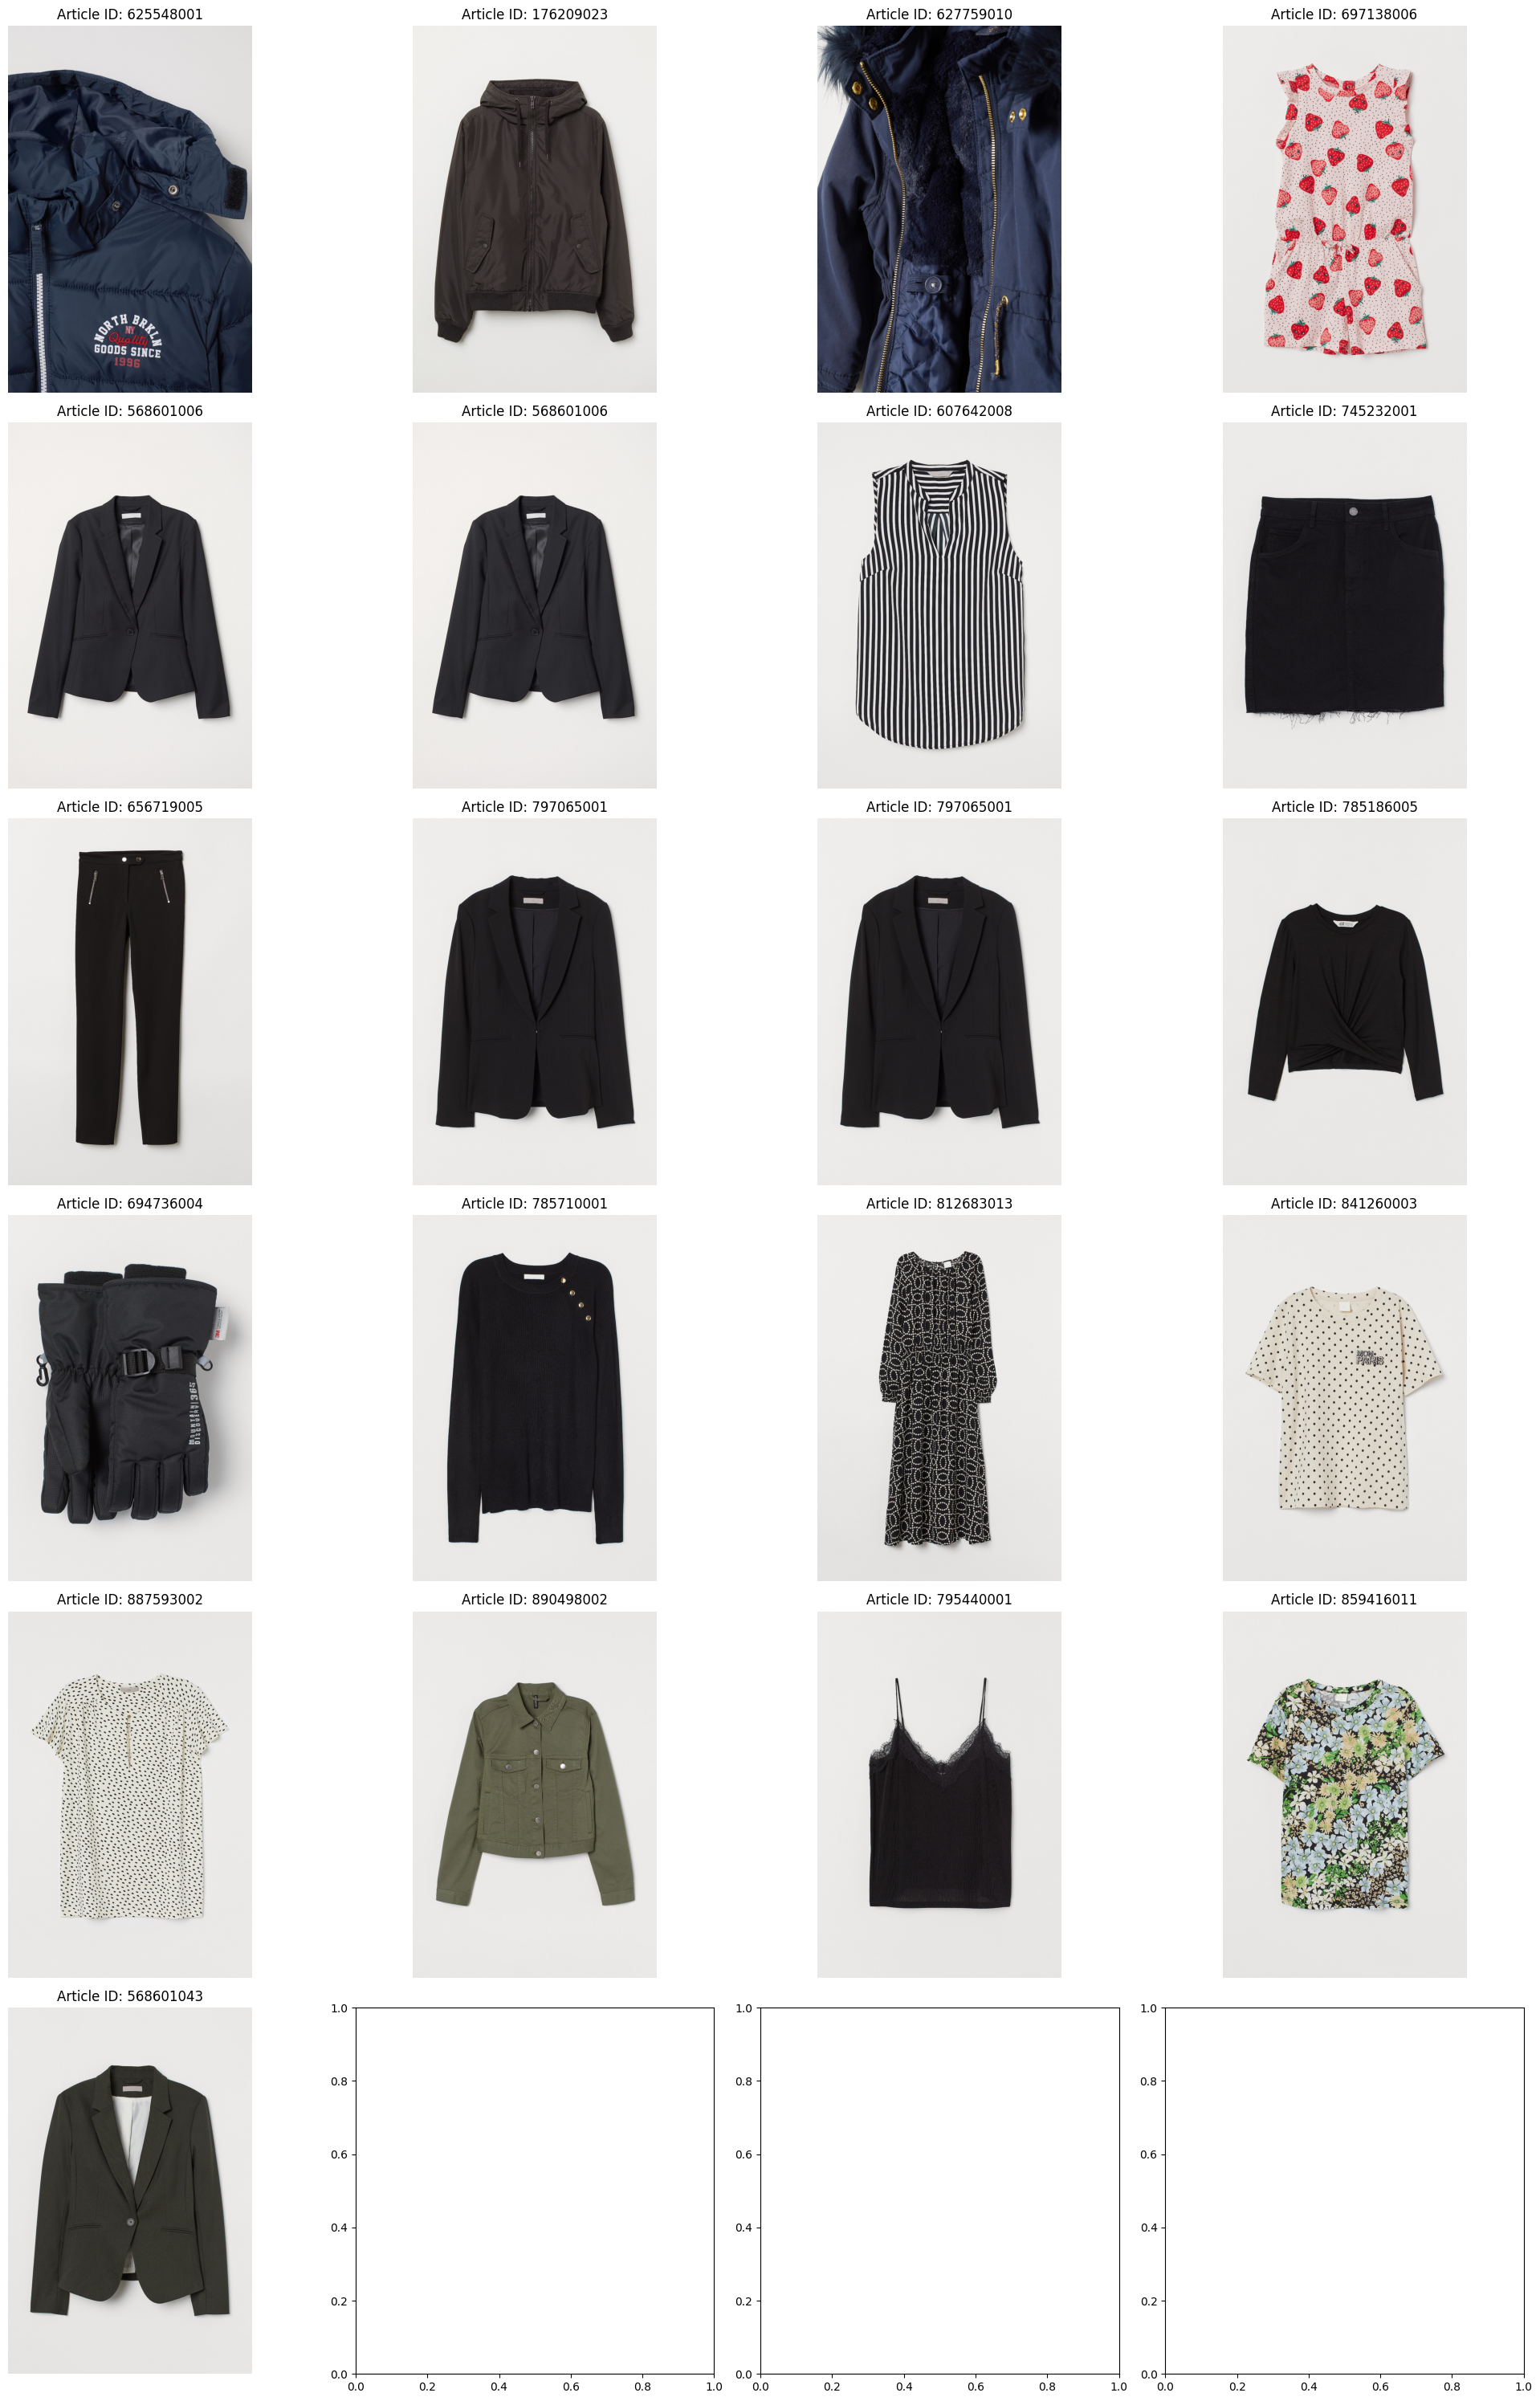

In [76]:
'''#Example usage for displaying images of purchased articles:
customer_article_ids_str = customer_transaction[customer_transaction['customer_id'] == customer_id]['article_ids'].tolist() 
customer_article_ids = [int(id) for id in customer_article_ids_str[0].split(",")]
print("Purchased articles:")
display_images(customer_article_ids)'''

In [83]:
def get_customer_transactions(customer_id, customer_transaction):
    """Step 1: Get customer transactions"""
    customer_transactions_for_id = customer_transaction[customer_transaction['customer_id'] == customer_id]['article_ids'].tolist()
    # Extract individual article IDs from transactions
    return [int(article_id) for transaction in customer_transactions_for_id for article_id in transaction.split(',')]

In [93]:
# Example usage:
customer_id = '00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'

In [94]:
get_customer_transactions(customer_id, customer_transaction)

[625548001,
 176209023,
 627759010,
 697138006,
 568601006,
 568601006,
 607642008,
 745232001,
 656719005,
 797065001,
 797065001,
 785186005,
 694736004,
 785710001,
 812683013,
 841260003,
 887593002,
 890498002,
 795440001,
 859416011,
 568601043]

In [95]:
def determine_categories(article_ids, article):
    """Step 2: Determine the categories of purchased items"""
    categories_counts = {}
    for article_id in article_ids:
        matching_rows = article.loc[article['article_id'] == article_id, 'product_type_name']
        if not matching_rows.empty:
            product_type_name = matching_rows.iloc[0]
            categories_counts[product_type_name] = categories_counts.get(product_type_name, 0) + 1
    return categories_counts

In [63]:
'''# Example article IDs
example_article_ids = [673677001,551080020,648414023,673677004,648414023]

# Call determine_categories function
categories_counts = determine_categories(example_article_ids, article)

# Print the result
print("Categories counts:")
print(categories_counts)'''

Categories counts:
{'Sweater': 2, 'T-shirt': 1, 'Hoodie': 2}


In [85]:
def select_top_items_per_category(article_ids, article, max_categories, max_items_per_category):
    """Step 3: Select the top most purchased items from each category"""
    # Determine categories counts
    categories_counts = determine_categories(article_ids, article)
    
    # Sort categories based on count
    sorted_categories = sorted(categories_counts.keys(), key=lambda x: categories_counts[x], reverse=True)
    
    top_items_per_category = {}
    
    for category in sorted_categories[:max_categories]:
        items_in_category = [article_id for article_id in article_ids if article.loc[article['article_id'] == article_id, 'product_type_name'].iloc[0] == category]
        top_items_per_category[category] = items_in_category[:max_items_per_category]
    
    return top_items_per_category

In [86]:
'''print(select_top_items_per_category(example_article_ids, article, max_categories=3, max_items_per_category=3))'''

'print(select_top_items_per_category(example_article_ids, article, max_categories=3, max_items_per_category=3))'

In [87]:
def top_categories(article_ids, article, max_categories=3, max_items_per_category=3):
    # Step 1: Get customer transactions
    #article_ids = get_customer_transactions(customer_id, customer_transactions)
    
    # Step 2: Determine the categories of purchased items
    categories_counts = determine_categories(article_ids, article)
    
    # Sort categories based on count from max to min
    sorted_categories_counts = dict(sorted(categories_counts.items(), key=lambda x: x[1], reverse=True))
    
    # Step 3: Select the top most purchased items from each category
    top_items_per_category = select_top_items_per_category(article_ids, article, max_categories, max_items_per_category)
    
    return {'categories_counts': sorted_categories_counts, 'top_items_per_category': top_items_per_category}

result=top_categories(article_ids,article)
print(result)

{'categories_counts': {'Trousers': 11169, 'Dress': 10362, 'Sweater': 9302, 'T-shirt': 7904, 'Top': 4155, 'Blouse': 3979, 'Jacket': 3940, 'Shorts': 3939, 'Shirt': 3405, 'Vest top': 2991, 'Underwear bottom': 2748, 'Skirt': 2696, 'Hoodie': 2356, 'Bra': 2212, 'Socks': 1889, 'Leggings/Tights': 1878, 'Sneakers': 1621, 'Cardigan': 1550, 'Hat/beanie': 1349, 'Garment Set': 1320, 'Swimwear bottom': 1307, 'Bag': 1280, 'Earring': 1159, 'Jumpsuit/Playsuit': 1147, 'Pyjama set': 1120, 'Blazer': 1110, 'Other accessories': 1034, 'Boots': 1028, 'Scarf': 1013, 'Bodysuit': 913, 'Hair/alice band': 854, 'Bikini top': 850, 'Sandals': 757, 'Swimsuit': 662, 'Sunglasses': 621, 'Necklace': 581, 'Cap/peaked': 573, 'Underwear Tights': 546, 'Coat': 460, 'Belt': 458, 'Polo shirt': 449, 'Hat/brim': 396, 'Other shoe': 395, 'Pyjama jumpsuit/playsuit': 388, 'Ballerinas': 372, 'Gloves': 367, 'Dungarees': 309, 'Slippers': 249, 'Hair clip': 244, 'Ring': 240, 'Hair string': 238, 'Pyjama bottom': 220, 'Heeled sandals': 202, 

In [79]:
def find_similar_articles(article_id, article_ids, similarity_matrix):
    """Find similar articles for a given article"""
    # Get the index of the specified article in the article_ids list
    article_index = article_ids.index(article_id)

    # Get the similarity scores for the specified article from the similarity matrix
    similarity_scores = similarity_matrix[article_index]

    # Sort the similarity scores in descending order and get the indices of the top 5 scores
    top_indices = np.argsort(similarity_scores)[::-1][:5]

    # Retrieve the top 5 similarity scores and their corresponding article IDs
    top_similarity_scores = similarity_scores[top_indices]
    top_article_ids = [article_ids[idx] for idx in top_indices]

    # Return the top 5 similar articles and their similarity scores
    similar_articles = [(article_id, score) for article_id, score in zip(top_article_ids, top_similarity_scores)]
    return similar_articles

In [80]:
def recommend_similar_articles(top_categories_result, article_ids, similarity_matrix):
    """Recommend similar articles for each top item per category"""
    recommendations = {}

    for category, items in top_categories_result['top_items_per_category'].items():
        category_recommendations = {}
        for item in items:
            similar_articles = find_similar_articles(item, article_ids, similarity_matrix)
            category_recommendations[item] = similar_articles
        recommendations[category] = category_recommendations

    return recommendations

In [81]:
top_categories_result = top_categories(article_ids, article)
recommendations = recommend_similar_articles(top_categories_result, article['article_id'].tolist(), similarity_matrix)
print(recommendations)

{'Trousers': {118458003: [(118458003, 1.0000000000000002), (118458029, 1.0000000000000002), (118458038, 0.9752715974411645), (118458004, 0.9718776631125032), (118458039, 0.9606476343293264)], 118458004: [(118458004, 1.0000000000000002), (118458039, 0.9742577097443206), (118458003, 0.9718776631125032), (118458029, 0.9718776631125032), (118458038, 0.9613804570434551)], 118458028: [(118458028, 0.9999999999999999), (118458038, 0.9783754079591201), (118458034, 0.9603356250418232), (118458029, 0.9539035034336756), (118458003, 0.9539035034336756)]}, 'Dress': {192460006: [(192460006, 1.0000000000000002), (212629048, 0.3462160080253455), (212629032, 0.3462160080253455), (212629040, 0.34480609180523086), (212629031, 0.3433546259142113)], 202017055: [(202017055, 1.0), (272591026, 0.5583007262089706), (212629051, 0.5513069662962498), (212629033, 0.5513069662962498), (254457031, 0.5490943655950564)], 212629004: [(212629004, 1.0), (212629032, 0.9749862787135761), (212629048, 0.9749862787135761), (21

In [71]:


# Iterate over each category
for category, items in recommendations.items():
    print(f"Category: {category}")
    print("---------------------")
    
    # Iterate over each top item in the category 
    for item_id, similar_articles in items.items(): 
        print("Top Item ID: {item_id}")
        
        # Iterate over similar articles for the top item
        for similar_article in similar_articles:
            similar_article_id, similarity_score=similar_article
            print(f"Similar Article ID: {similar_article_id}, Similarity Score: {similarity_score}")
            
        print() # Add an empty line between top items
        
    print() # Add an empty line between categories


Category: Trousers
---------------------
Top Item ID: {item_id}
Similar Article ID: 118458003, Similarity Score: 1.0000000000000002
Similar Article ID: 118458029, Similarity Score: 1.0000000000000002
Similar Article ID: 118458038, Similarity Score: 0.9752715974411645
Similar Article ID: 118458004, Similarity Score: 0.9718776631125032
Similar Article ID: 118458039, Similarity Score: 0.9606476343293264

Top Item ID: {item_id}
Similar Article ID: 118458004, Similarity Score: 1.0000000000000002
Similar Article ID: 118458039, Similarity Score: 0.9742577097443206
Similar Article ID: 118458003, Similarity Score: 0.9718776631125032
Similar Article ID: 118458029, Similarity Score: 0.9718776631125032
Similar Article ID: 118458038, Similarity Score: 0.9613804570434551

Top Item ID: {item_id}
Similar Article ID: 118458028, Similarity Score: 0.9999999999999999
Similar Article ID: 118458038, Similarity Score: 0.9783754079591201
Similar Article ID: 118458034, Similarity Score: 0.9603356250418232
Simi

In [88]:

#Create an empty list to store recommended articles
recommended_articles = []

# Create an empty list to store recommended article: 10 
rec_article_ids = []

In [89]:
# Iterate over each category and items in recommendations
for category, items in recommendations.items(): 
    # Iterate over each Top item in the category 
    for item_id, similar_articles in items.items():
        # Iterate over similar articles for the top item
        for similar_article in similar_articles: 
            similar_article_id, similarity_score = similar_article
            # Check if the recommended article is not already purchased by the customer
            if similar_article_id not in article_ids:
                # Append the article ID, similarity score, and category to the list of recommended articles
                recommended_articles.append((similar_article_id, similarity_score))
                rec_article_ids.append(similar_article_id)

# Sort the recommended articles based on similarity score in descending order
recommended_articles.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 recommended articles
print("The 10 Recommended Articles:")
for i, (article_id, similarity_score) in enumerate(recommended_articles[:10], 1): 
    print(f"{i}. Article ID: {article_id}, Similarity Score: {similarity_score}")

rec_articles = [article_id for article_id, _ in recommended_articles]
print("Recommended Article IDs:")
print(rec_articles)


The 10 Recommended Articles:
Recommended Article IDs:
[]


In [90]:
display_images(rec_articles[:10])

ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

In [108]:
def recommend_articles(recommendations,article_ids):
    # Create an empty list to store recommended articles
    recommended_articles = []

    # Create an empty list to store recommended article IDs
    rec_article_ids = []

    # Iterate over each category and items in recommendations
    for category, items in recommendations.items():
        # Iterate over each top item in the category
        for item_id, similar_articles in items.items():
            # Iterate over similar articles for the top item
            for similar_article in similar_articles:
                similar_article_id, similarity_score = similar_article
                # Check if the recommended article is not already purchased by the customer
                if similar_article_id not in article_ids:
                    # Append the article ID, similarity score, and category to the list of recommended articles
                    recommended_articles.append((similar_article_id, similarity_score))
                    rec_article_ids.append(similar_article_id)

    # Sort the recommended articles based on similarity score in descending order
    recommended_articles.sort(key=lambda x: x[1], reverse=True)

    # Print the top 10 recommended articles
    print("The 10 Recommended Articles:")
    for i, (article_id, similarity_score) in enumerate(recommended_articles[:3], 1):
        print(f"{i}. Article ID: {article_id}, Similarity Score: {similarity_score}")

    # Get recommended article IDs
    rec_articles = [article_id for article_id, _ in recommended_articles]
    print("Recommended Article IDs:")
    print(rec_articles)

    # Display images of recommended articles
    display_images(rec_articles[:3])

In [92]:

recommend_articles(recommendations, article_ids)

The 10 Recommended Articles:
Recommended Article IDs:
[]


ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

In [ ]:
'''# Create a set to store the articles already purchased by the customer
purchased_articles = set()

# Add the IDs of purchased articles to the set
for transaction in customer_transactions:
    article_ids = transaction['article_ids'].split(',')
    purchased_articles.update(article_ids)

# Create an empty list to store recommended articles
recommended_articles = []

# Iterate over each category
for category, items in recommendations.items():
    # Iterate over each top item in the category
    for item_id, similar_articles in items.items():
        # Iterate over similar articles for the top item
        for similar_article in similar_articles:
            similar_article_id, similarity_score = similar_article
            # Check if the recommended article is not already purchased by the customer
            if similar_article_id not in purchased_articles:
                # Add the article ID, similarity score, and category to the list
                recommended_articles.append((similar_article_id, similarity_score))

# Sort the recommended articles based on similarity score in descending order
recommended_articles.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 recommended articles
print("Top 10 Recommended Articles:")
for i, (article_id, similarity_score) in enumerate(recommended_articles[:10], 1):
    print(f"{i}. Article ID: {article_id}, Similarity Score: {similarity_score}")'''


In [ ]:
## if customer place order .. this code block perfectly returns the cutomer_id and article id it purchase.
from flask import Flask, request

app = Flask(__name__)

@app.route('/confirm_order', methods=['POST'])
def confirm_order():
    data = request.json
    user_id = data.get('userId')
    product_ids = data.get('productIds')

    print("Received order for User ID:", user_id)
    print("Product IDs:", product_ids)

    # Perform any additional processing here

    return 'Order confirmed successfully'

    
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)  

In [66]:

# get userid and then find in customer_tran... and return articles
def find_customer_transactions(customer_id):
    # Get the path to the desktop
    desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
    
    # Construct the path to customer_transactions.csv
    csv_file_path = os.path.join(desktop_path, 'customer_transactions.csv')
    
    # Check if the file exists
    if not os.path.exists(csv_file_path):
        print("customer_transactions.csv file not found on the desktop.")
        return
    
    # Open the CSV file and search for the customer id
    with open(csv_file_path, 'r') as file:
        csv_reader = csv.reader(file)
        found = False
        for row in csv_reader:
            if row[0] == customer_id:
                found = True
                print("Customer ID:", customer_id)
                print("Article IDs:", row[1])
                break
        
        if not found:
            print("Customer ID", customer_id, "not found in the transactions.")

# Example usage
customer_id = "AhhaXDg5l6dTd6ZIBmgFvQL4BW93"
find_customer_transactions(customer_id)

Customer ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
Article IDs: 673677001,551080020,648414023,673677004


In [50]:
'''def find_customer_transactions(customer_id):
    # Get the path to the desktop
    desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
    
    # Construct the path to customer_transactions.csv
    csv_file_path = os.path.join(desktop_path, 'customer_transactions.csv')
    
    # Check if the file exists
    if not os.path.exists(csv_file_path):
        print("customer_transactions.csv file not found on the desktop.")
        return
    
    # Open the CSV file and search for the customer id
    with open(csv_file_path, 'r') as file:
        csv_reader = csv.reader(file)
        found = False
        for row in csv_reader:
            if row[0] == customer_id:
                found = True
                print("Customer ID:", customer_id)
                print("Article IDs:", row[1])
                return {"Customer ID": customer_id, "Article IDs": row[1]}  # Return instead of print
                # break # You don't need to break here, as it stops the loop early
        
        if not found:
            print("Customer ID", customer_id, "not found in the transactions.")
            return {"error": "Customer ID not found"}'''

In [97]:
def find_customer_transactions(customer_id, customer_transaction):
    # Check if the DataFrame is empty
    if customer_transaction.empty:
        print("Customer transactions DataFrame is empty.")
        return
    
    # Search for the customer id
    found = customer_transaction[customer_transaction['customer_id'] == customer_id]
    if not found.empty:
        # Get the article IDs for the specified customer ID
        article_ids = found['article_ids'].iloc[0]  # Assuming article_ids is stored as a string
        print("Article IDs for Customer ID:", customer_id)
        print(article_ids)
        
        return found, article_ids
    else:
        print("Customer ID", customer_id, "not found in the transactions.")
        return {"error": "Customer ID not found"}, None

# Example usage:
customer_id = "AhhaXDg5l6dTd6ZIBmgFvQL4BW93"  # Replace with the desired customer ID
result, article_ids = find_customer_transactions(customer_id, customer_transaction)
print("Article IDs:", article_ids)

###################################################correct ################################


Article IDs for Customer ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
673677001,551080020,648414023,673677004,673677001,673677001,673677001
Article IDs: 673677001,551080020,648414023,673677004,673677001,673677001,673677001


## category found with article ids


Article IDs for Customer ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
[673677001, 551080020, 648414023, 673677004, 673677001, 673677001, 673677001]
Article IDs: [673677001, 551080020, 648414023, 673677004, 673677001, 673677001, 673677001]
Categories counts:
{'Sweater': 5, 'T-shirt': 1, 'Hoodie': 1}
The 10 Recommended Articles:
1. Article ID: 673677027, Similarity Score: 0.985452241831537
2. Article ID: 648414022, Similarity Score: 0.9710258402380219
3. Article ID: 673677012, Similarity Score: 0.968696387696297
4. Article ID: 648414003, Similarity Score: 0.9685542850222052
5. Article ID: 648414011, Similarity Score: 0.9685542850222052
6. Article ID: 673677023, Similarity Score: 0.9679274402611681
7. Article ID: 673677023, Similarity Score: 0.9573894310337704
8. Article ID: 551080007, Similarity Score: 0.9525053456030501
9. Article ID: 648414004, Similarity Score: 0.949856849888721
10. Article ID: 673677027, Similarity Score: 0.9498435546477897
Recommended Article IDs:
[673677027, 648414022, 6736770

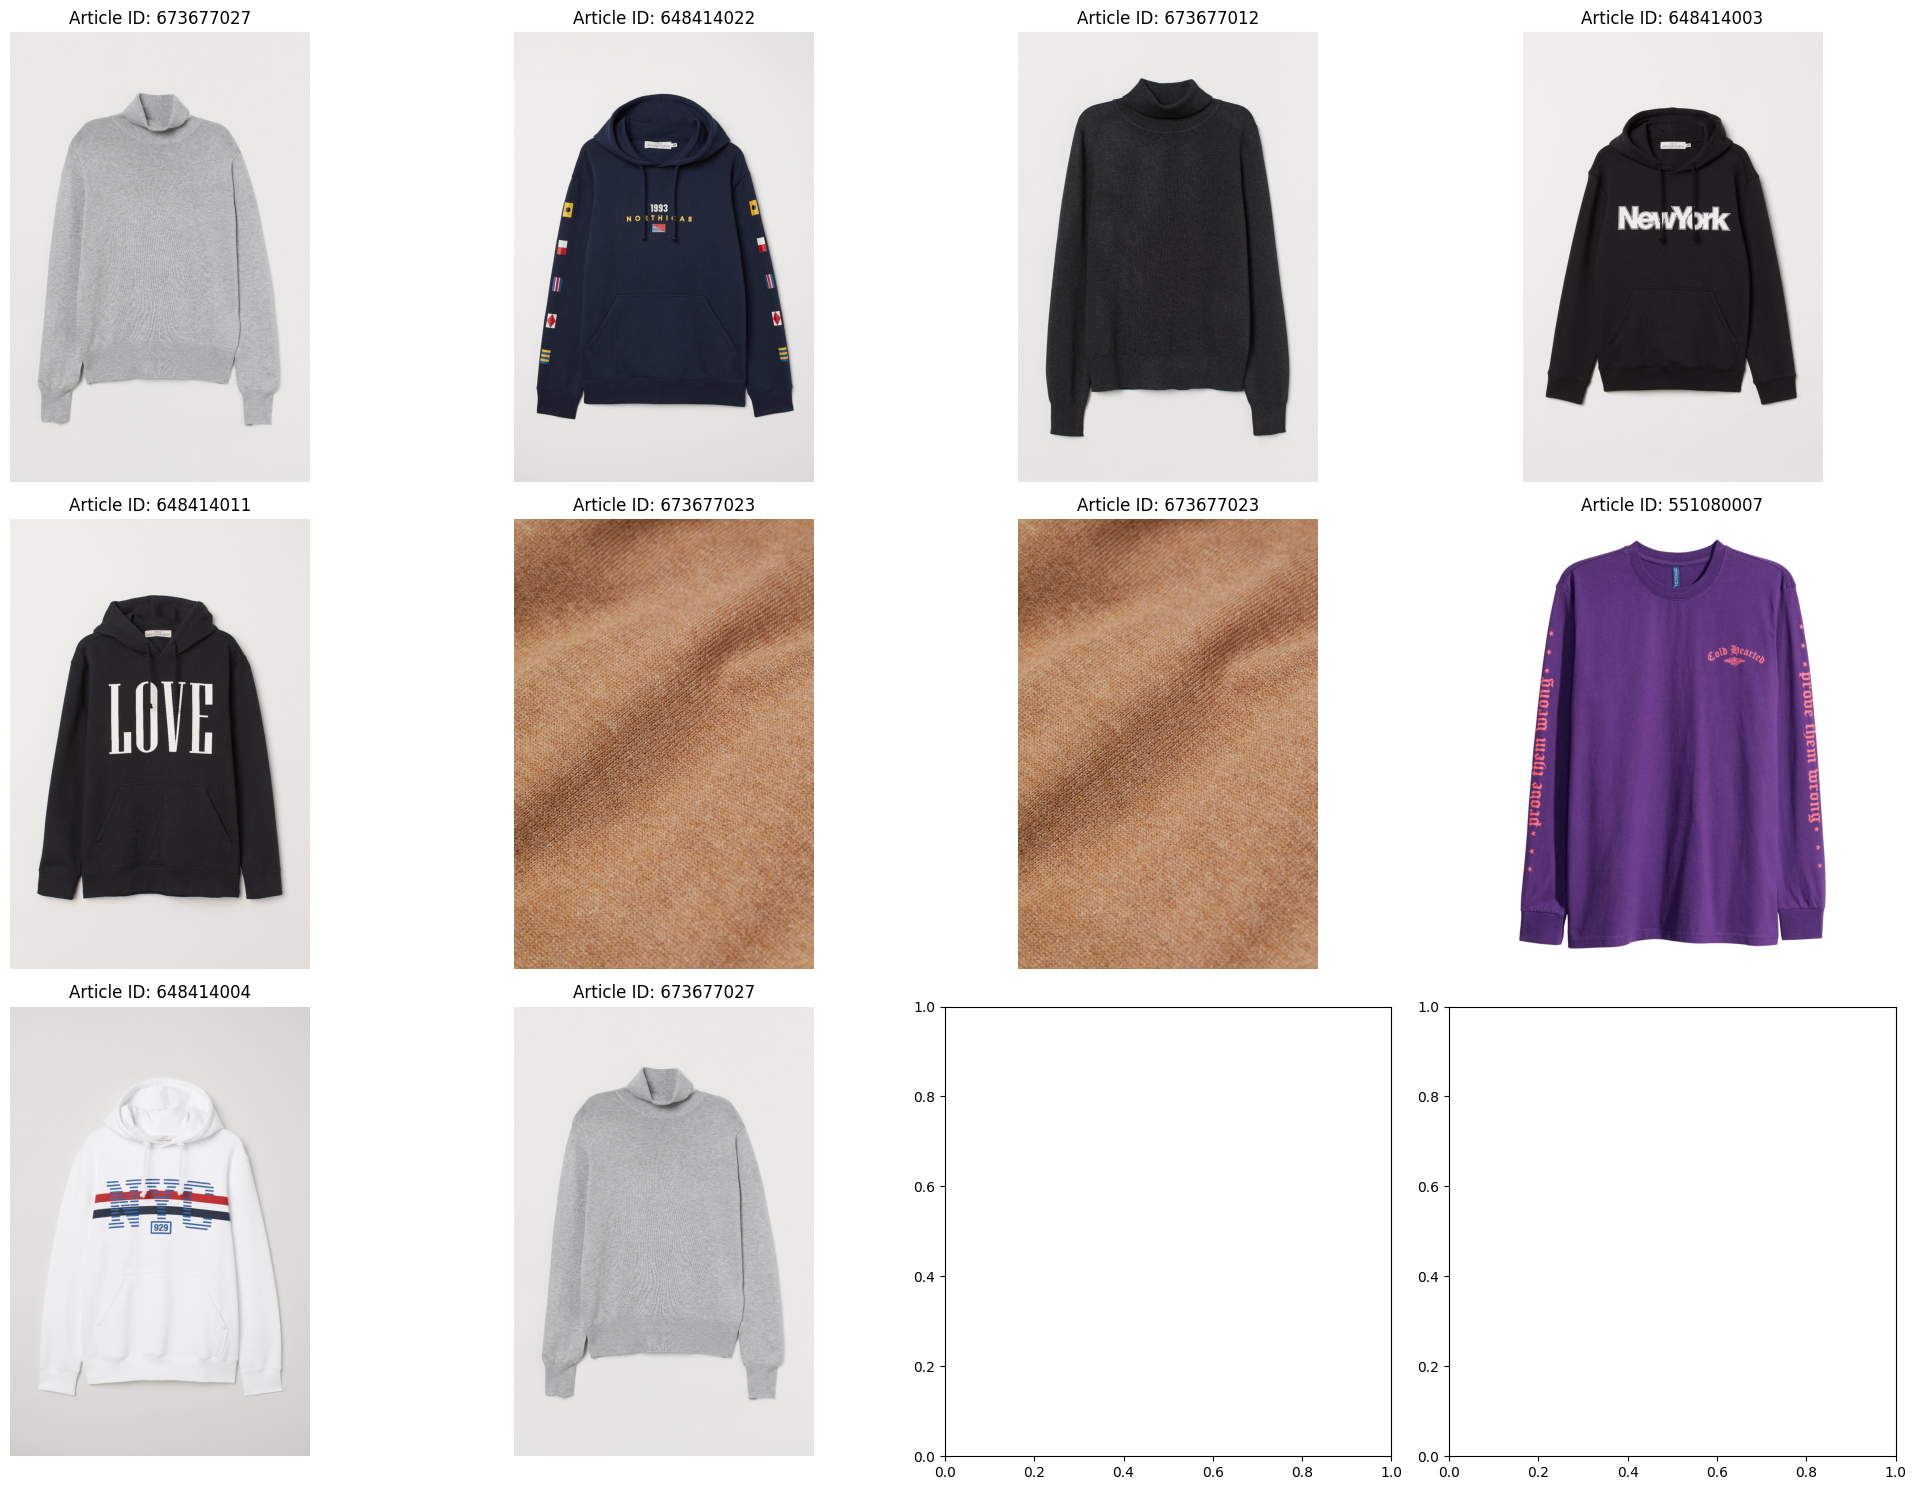

In [98]:
def find_customer_transactions(customer_id, customer_transactions):
    # Check if the DataFrame is empty
    if customer_transactions.empty:
        print("Customer transactions DataFrame is empty.")
        return
    
    # Search for the customer id
    found = customer_transactions[customer_transactions['customer_id'] == customer_id]
    if not found.empty:
        
        # Get the article IDs for the specified customer ID
        article_ids_string = found['article_ids'].iloc[0]  # Assuming article_ids is stored as a string
        article_ids = [int(id.strip()) for id in article_ids_string.split(",")]  # Convert to list of integers
        print("Article IDs for Customer ID:", customer_id)
        print(article_ids)
        
        return found, article_ids
    else:
        print("Customer ID", customer_id, "not found in the transactions.")
        return {"error": "Customer ID not found"}, None

# Example usage:
customer_id = "AhhaXDg5l6dTd6ZIBmgFvQL4BW93"  # Replace with the desired customer ID

# Call find_customer_transactions function
result, article_ids = find_customer_transactions(customer_id, customer_transaction)
print("Article IDs:", article_ids)

# Check if article_ids is not None before calling determine_categories
if article_ids is not None:
    # Call determine_categories function
    categories_counts = determine_categories(article_ids, article)
    # Print the result
    print("Categories counts:")
    print(categories_counts)
#get top categories    
top_categories_result = top_categories(article_ids, article)
recommendations = recommend_similar_articles(top_categories_result, article['article_id'].tolist(), similarity_matrix)
recommend_articles(recommendations, article_ids)



## flask server : Get customer articles and define it categories

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6000
 * Running on http://10.7.224.203:6000
Press CTRL+C to quit


AhhaXDg5l6dTd6ZIBmgFvQL4BW93
Article IDs for Customer ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
[673677001, 551080020, 648414023, 673677004, 673677001, 673677001, 673677001]
Categories counts:
{'Sweater': 5, 'T-shirt': 1, 'Hoodie': 1}
The 10 Recommended Articles:
1. Article ID: 673677027, Similarity Score: 0.985452241831537
2. Article ID: 648414022, Similarity Score: 0.9710258402380219
3. Article ID: 673677012, Similarity Score: 0.968696387696297
4. Article ID: 648414003, Similarity Score: 0.9685542850222052
5. Article ID: 648414011, Similarity Score: 0.9685542850222052
6. Article ID: 673677023, Similarity Score: 0.9679274402611681
7. Article ID: 673677023, Similarity Score: 0.9573894310337704
8. Article ID: 551080007, Similarity Score: 0.9525053456030501
9. Article ID: 648414004, Similarity Score: 0.949856849888721
10. Article ID: 673677027, Similarity Score: 0.9498435546477897
Recommended Article IDs:
[673677027, 648414022, 673677012, 648414003, 648414011, 673677023, 673677023, 551080007, 648

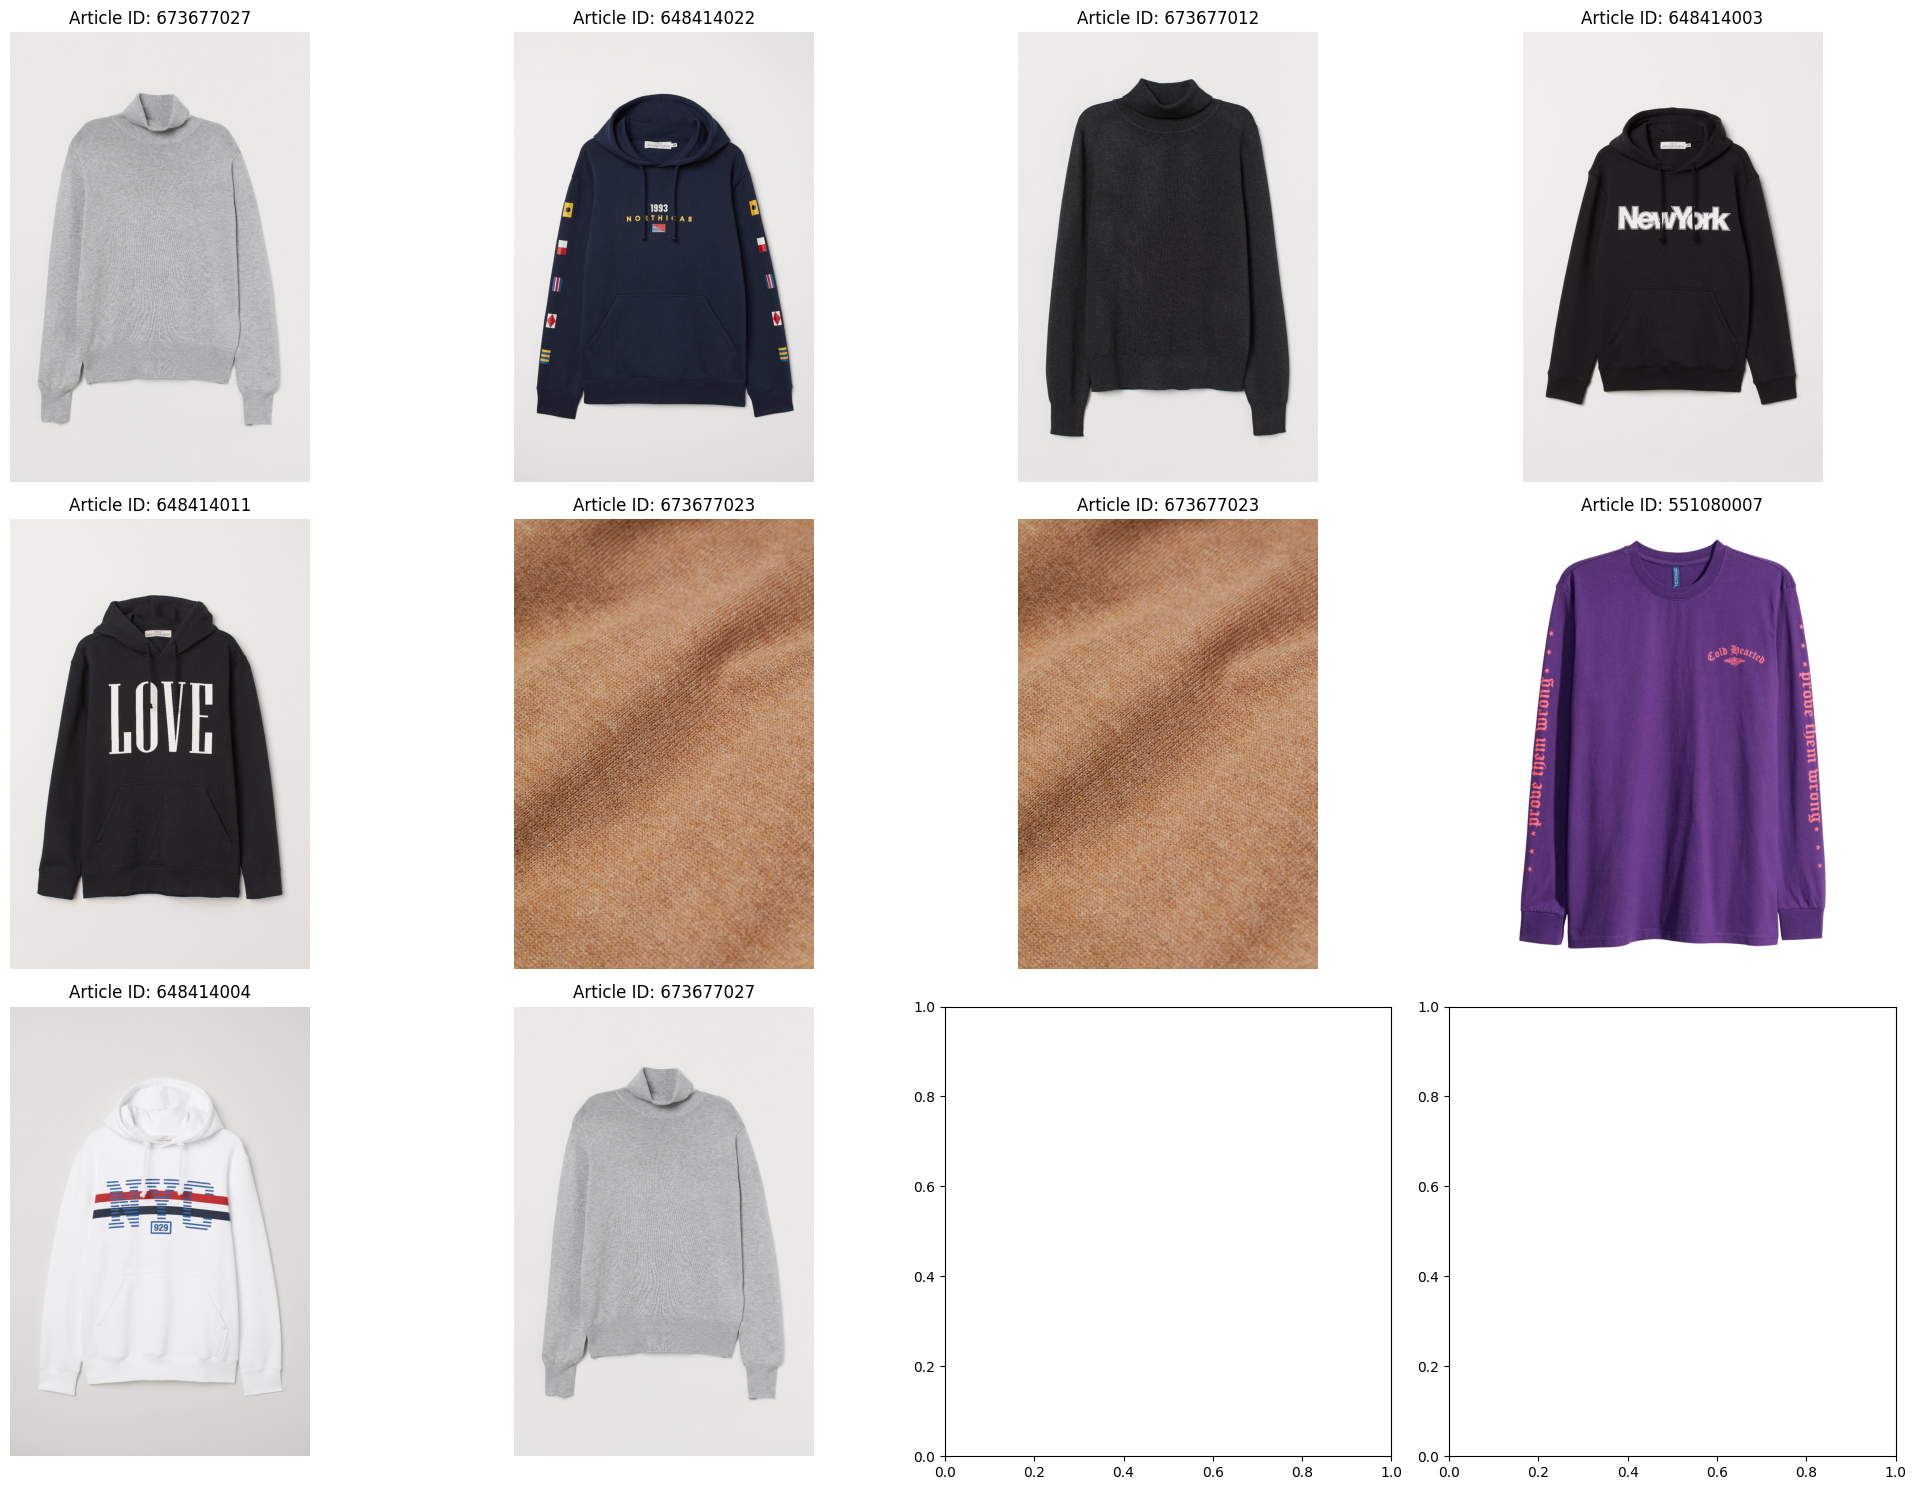

10.7.192.51 - - [01/May/2024 16:28:55] "POST /get_customer_articles HTTP/1.1" 200 -


In [100]:
### properly working code ... get request adn reutrn the arcticels 
app = Flask(__name__)

@app.route('/get_customer_articles', methods=['POST'])
def get_customer_articles():
    data = request.json
    customer_id = data.get('userId')
    print(customer_id )
    # Call find_customer_transactions function
    result, article_ids = find_customer_transactions(customer_id, customer_transaction)
    
    # Check if article_ids is not None before calling determine_categories
    if article_ids is not None:
        # Call determine_categories function
        categories_counts = determine_categories(article_ids, article)
        # Print the result
        print("Categories counts:")
        print(categories_counts)
        
    #get top categories    
    top_categories_result = top_categories(article_ids, article)
    recommendations = recommend_similar_articles(top_categories_result, article['article_id'].tolist(), similarity_matrix)
    recommend_articles(recommendations, article_ids)

    return categories_counts

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)


# Flask server to append CSV

In [79]:
#### append order to csv   theek wala codeeeeeee....
from flask import Flask, request
import csv
import os

app = Flask(__name__)

def update_transactions(user_id, product_ids):
    file_path = '/Users/azkayounus/Desktop/customer_transactions.csv' # Update the path to your CSV file
    exists = os.path.isfile(file_path)
    updated = False
    
    with open(file_path, mode='a+', newline='') as file:
        fieldnames = ['customer_id', 'article_ids']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        
        if not exists:
            writer.writeheader()

        # Check if user ID already exists in the CSV
        with open(file_path, mode='r') as csvfile:
            reader = csv.DictReader(csvfile)
            rows = list(reader)
            for row in rows:
                if row['customer_id'] == user_id:
                    existing_product_ids = row['article_ids'].split(',')
                    existing_product_ids.extend(map(str, product_ids))  # Convert integers to strings
                    row['article_ids'] = ','.join(existing_product_ids)
                    updated = True
                    break

        # If user ID not found, append a new row
        if not updated:
            rows.append({'customer_id': user_id, 'article_ids': ','.join(map(str, product_ids))})  # Convert integers to strings
    
    # Write all the rows back to the CSV file
    with open(file_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)
    
    if updated:
        print(f"Customer transactions updated for User ID: {user_id}")
    else:
        print(f"New customer transaction added for User ID: {user_id}")
        
@app.route('/confirm_order', methods=['POST'])
def confirm_order():
    data = request.json
    user_id = data.get('userId')
    product_ids = data.get('productIds')

    print("Received order for User ID:", user_id)
    print("Product IDs:", product_ids)

    update_transactions(user_id, product_ids)

    return 'Order confirmed successfully'

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6000
 * Running on http://10.7.225.166:6000
Press CTRL+C to quit


Received order for User ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
Product IDs: [551080020, 648414023, 673677004, 673677001]


10.7.224.18 - - [22/Apr/2024 18:50:48] "POST /confirm_order HTTP/1.1" 200 -


Customer transactions updated for User ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93


## Basic Code

In [ ]:
### properly working code ... get request adn reutrn the arcticels 
app = Flask(__name__)

@app.route('/get_customer_articles', methods=['POST'])
def get_customer_articles():
    data = request.json
    customer_id = data.get('userId')
    print(customer_id )
    result = find_customer_transactions(customer_id)

    return result

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)

In [101]:

def update_transactions(user_id, product_ids):
    file_path = '/Users/azkayounus/Desktop/customer_transactions.csv' # Update the path to your CSV file
    exists = os.path.isfile(file_path)
    updated = False
    
    with open(file_path, mode='a+', newline='') as file:
        fieldnames = ['customer_id', 'article_ids']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        
        if not exists:
            writer.writeheader()

        # Check if user ID already exists in the CSV
        with open(file_path, mode='r') as csvfile:
            reader = csv.DictReader(csvfile)
            rows = list(reader)
            for row in rows:
                if row['customer_id'] == user_id:
                    existing_product_ids = row['article_ids'].split(',')
                    existing_product_ids.extend(map(str, product_ids))  # Convert integers to strings
                    row['article_ids'] = ','.join(existing_product_ids)
                    updated = True
                    break

        # If user ID not found, append a new row
        if not updated:
            rows.append({'customer_id': user_id, 'article_ids': ','.join(map(str, product_ids))})  # Convert integers to strings
    
    # Write all the rows back to the CSV file
    with open(file_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(rows)
    
    if updated:
        print(f"Customer transactions updated for User ID: {user_id}")
    else:
        print(f"New customer transaction added for User ID: {user_id}")

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6000
 * Running on http://10.7.224.203:6000
Press CTRL+C to quit


Received order for User ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
Product IDs: [673677001]
Customer transactions updated for User ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
Article IDs for Customer ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
[673677001, 551080020, 648414023, 673677004, 673677001, 673677001, 673677001, 673677001]
Categories counts:
{'Sweater': 6, 'T-shirt': 1, 'Hoodie': 1}
The 10 Recommended Articles:
1. Article ID: 673677027, Similarity Score: 0.985452241831537
2. Article ID: 648414022, Similarity Score: 0.9710258402380219
3. Article ID: 673677012, Similarity Score: 0.968696387696297
4. Article ID: 648414003, Similarity Score: 0.9685542850222052
5. Article ID: 648414011, Similarity Score: 0.9685542850222052
6. Article ID: 673677023, Similarity Score: 0.9679274402611681
7. Article ID: 673677023, Similarity Score: 0.9573894310337704
8. Article ID: 551080007, Similarity Score: 0.9525053456030501
9. Article ID: 648414004, Similarity Score: 0.949856849888721
10. Article ID: 673677027, Similarity Score: 

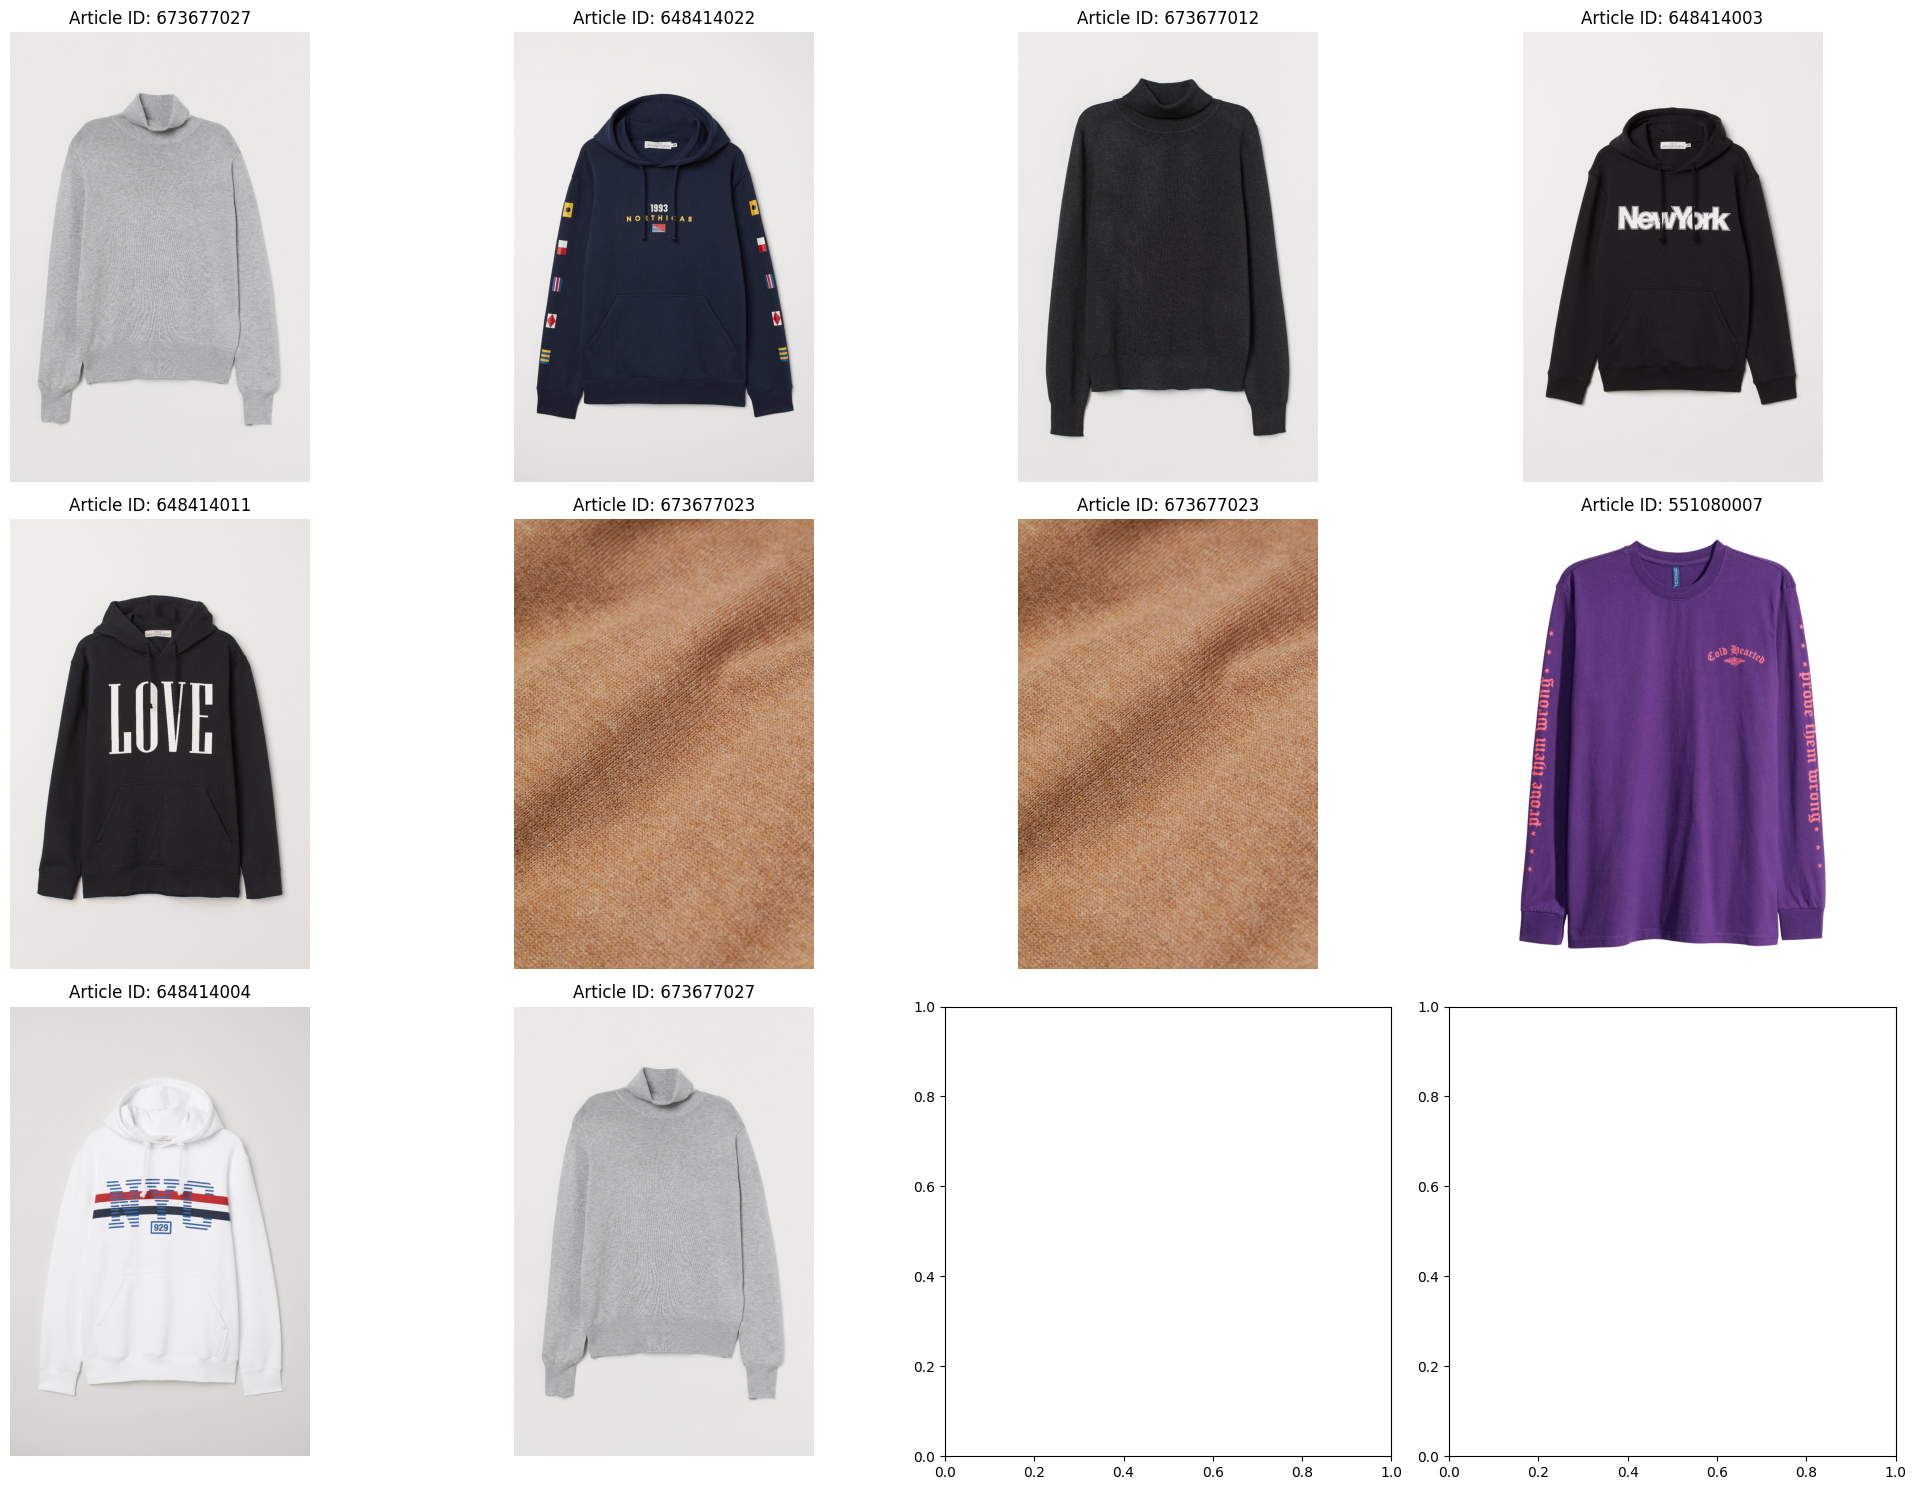

10.7.192.51 - - [01/May/2024 16:30:27] "POST /confirm_order HTTP/1.1" 200 -


In [102]:
#### append order to csv   theek wala codeeeeeee....

app = Flask(__name__)
      
@app.route('/confirm_order', methods=['POST'])
def confirm_order():
    data = request.json
    user_id = data.get('userId')
    product_ids = data.get('productIds')

    print("Received order for User ID:", user_id)
    print("Product IDs:", product_ids)

    update_transactions(user_id, product_ids)
    
    # reload transaction file for updated order
    fp = '/Users/azkayounus/Desktop/customer_transactions.csv'
    customer_transaction =pd.read_csv(fp)
    
    result, article_ids = find_customer_transactions(user_id, customer_transaction)
    
    # Check if article_ids is not None before calling determine_categories
    if article_ids is not None:
        # Call determine_categories function
        categories_counts = determine_categories(article_ids, article)
        # Print the result
        print("Categories counts:")
        print(categories_counts)
    if len(article_ids)>3:    
    #get top categories    
    
        top_categories_result = top_categories(article_ids, article)
        recommendations = recommend_similar_articles(top_categories_result, article['article_id'].tolist(), similarity_matrix)
        recommend_articles(recommendations, article_ids)
    
    else:
        
        print ("The Customer is not regular.......")

    return 'Order confirmed successfully'

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)

## new code to fetch images from the firebase

In [117]:
from flask import Flask, request, jsonify
import firebase_admin
from firebase_admin import credentials, storage, initialize_app
import random
import datetime

app = Flask(__name__)

if not firebase_admin._apps:
    cred = credentials.Certificate('/Users/azkayounus/Desktop/intellishop-37949-firebase-adminsdk-vh31q-81d7255bb3.json') # Replace 'path/to/serviceAccountKey.json' with the path to your service account key JSON file
    firebase_admin.initialize_app(cred, { 'storageBucket': 'intellishop-37949.appspot.com' }) # Replace 'intellishop-37949.appspot.com' with your storage bucket URL

# Get a reference to the bucket
bucket = storage.bucket()

@app.route('/confirm_order', methods=['POST'])
def confirm_order():
    data = request.json
    user_id = data.get('userId')
    product_ids = data.get('productIds')

    print("Received order for User ID:", user_id)
    print("Product IDs:", product_ids)

    update_transactions(user_id, product_ids)
    
    # Reload transaction file for updated order
    fp = '/Users/azkayounus/Desktop/customer_transactions.csv'
    customer_transaction = pd.read_csv(fp)
    
    result, article_ids = find_customer_transactions(user_id, customer_transaction)
    
    # Check if article_ids is not None before calling determine_categories
    if article_ids is not None:
        # Call determine_categories function
        categories_counts = determine_categories(article_ids, article)
        # Print the result
        print("Categories counts:")
        print(categories_counts)
        
        # Check if the user is regular (has purchased more than 3 items)
        if len(article_ids) > 3:
            # Get top categories    
            top_categories_result = top_categories(article_ids, article)
            recommendations = recommend_similar_articles(top_categories_result, article['article_id'].tolist(), similarity_matrix)
            
            # Get recommended articles
            recommended_articles = []
            for category, items in recommendations.items():
                for item_id, similar_articles in items.items():
                    for similar_article in similar_articles:
                        similar_article_id, similarity_score = similar_article
                        # Check if the recommended article is not already purchased by the customer
                        if similar_article_id not in article_ids:
                            recommended_articles.append(similar_article_id)
            
            # Get image URLs for recommended articles from Firebase Storage
            recommended_image_urls = get_recommended_images_from_storage(recommended_articles)
            print(recommended_image_urls)
            # Return recommended image URLs
            return jsonify({'recommended_image_urls': recommended_image_urls})
        
        else:
            print("The Customer is not regular.......")

    return 'Order confirmed successfully'

def get_recommended_images_from_storage(recommended_articles):
    recommended_image_urls = []
    for article_id in recommended_articles:
        # Construct the file path
        article_id_with_zero = '0' + str(article_id)
        image_path = f'images/{article_id_with_zero[:3]}/{article_id_with_zero}.jpg'

        # Generate a signed URL with 1-hour expiration time
        expiration = datetime.timedelta(hours=1)
        signed_url = bucket.blob(image_path).generate_signed_url(expiration, method='GET')
        recommended_image_urls.append(signed_url)
    return recommended_image_urls

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=6000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6000
 * Running on http://192.168.1.194:6000
Press CTRL+C to quit


Received order for User ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
Product IDs: [551080020]
Customer transactions updated for User ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93


192.168.1.203 - - [01/May/2024 21:46:33] "POST /confirm_order HTTP/1.1" 200 -


Article IDs for Customer ID: AhhaXDg5l6dTd6ZIBmgFvQL4BW93
[673677001, 551080020, 648414023, 673677004, 673677001, 673677001, 673677001, 673677001, 673677001, 673677001, 673677001, 551080020, 551080020, 673677001, 673677004, 673677001, 648414023, 551080020, 551080020, 673677004, 673677004, 551080020, 673677001, 551080020, 673677001, 551080020, 551080020, 673677004, 551080020, 673677001, 551080020]
Categories counts:
{'Sweater': 18, 'T-shirt': 11, 'Hoodie': 2}
['https://storage.googleapis.com/intellishop-37949.appspot.com/images/067/0673677027.jpg?Expires=1714585593&GoogleAccessId=firebase-adminsdk-vh31q%40intellishop-37949.iam.gserviceaccount.com&Signature=ntzRVhBi34YEdIW%2BY%2BZ8xFAJl9SHjnOwfJExJUt%2FuXjEOBfuMNB0N3ywPfJ5XTVRm%2BbsVfL4DOIsDQQV7HMnajbWT7J%2BmdBi39lBbe%2B5sXrFiA90kSfmhOnaIyIrBEnQO2cVE08QGeUOQUAt1nSR2IsPhaU50a7Evo6STOc9n%2FpXtMwz703oX6h50uZjLdJTBDMKsxfK1GIKQU8TKpOux1DK8q%2B6YQS7MqofTQWUBn1knkqH%2B0Oc3AQeqtB4%2Bw1o4%2BoBvl3hqgDKp3o2m7CqJsrtwEjUNxg%2BwHOoadehp9i2fOTnL5pTjZIX